<a href="https://colab.research.google.com/github/arshiyasaiyad/Calculator/blob/main/Feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9359 - accuracy: 0.3032 - val_loss: 1.8507 - val_accuracy: 0.3222
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7537 - accuracy: 0.3777 - val_loss: 1.6944 - val_accuracy: 0.3963
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6768 - accuracy: 0.4050 - val_loss: 1.6250 - val_accuracy: 0.4208
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6277 - accuracy: 0.4259 - val_loss: 1.6215 - val_accuracy: 0.4244
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5879 - accuracy: 0.4387 - val_loss: 1.6744 - val_accuracy: 0.4014
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5579 - accuracy: 0.4492 - val_loss: 1.5764 - val_accuracy: 0.4349
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step -

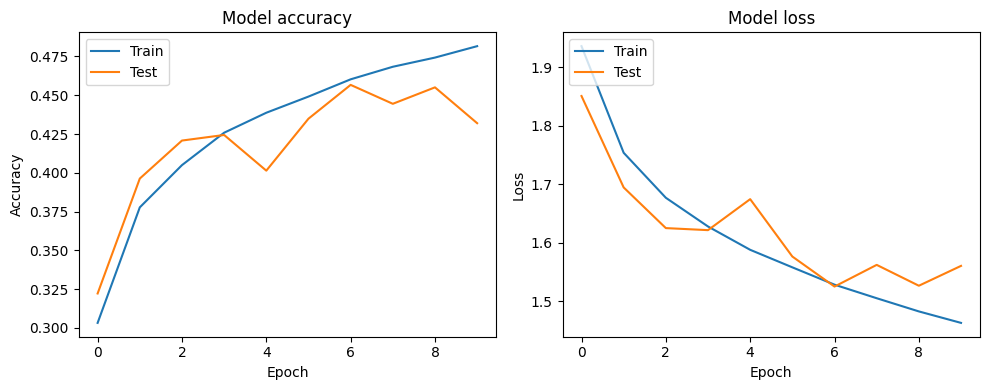

In [2]:

#ass1#Implementing Feedforward neural networks with Keras and TensorFlow
#a. Import the necessary packages
#b. Load the training and testing data (MNIST)
#c. Define the network architecture using Keras
#d. Train the model using SGD
#e. Evaluate the network.
#f. Plot the training loss and accuracy


# Step 1: Import necessary packages
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Step 2: Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Step 3: Define the network architecture
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Adjust input shape for CIFAR-10
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Step 6: Evaluate the network
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

# Step 7: Plot the training loss and accuracy
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()